# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

Saat ini saya mengajar di Teknik Informatika UNISSULA dan salah satu orientasi pengembangan akan berorientasi kepada pembelajaran dan penelitian artificial intelligent. Sebagai orang yang punya backdround pendidikan sistem informasi dan manajemen bisnis maka orientasi pengembangan pribadi untuk masuk dalam pembelajaran dan penelitian data science, khususnya bidang text mining. 
Untuk eksplorasi penelitian text mining, salah satu submber data yang bisa didapatkan melalui proses scraping data di website Oleh karena itu pada capstone project ini saya menentukan pilihan WEB SCRAPING menggunakan BeautifulShoup.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [2]:
import requests

url_get = requests.get('https://www.exchange-rates.org/exchange-rate-history/usd-idr')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [3]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [6]:
table1 = soup.find_all('a',attrs={'class':'n'})
table1

[<a class="n" href="/exchange-rate-history/usd-idr-2023-09-01">2023-9-1</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-08-31">2023-8-31</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-08-30">2023-8-30</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-08-29">2023-8-29</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-08-28">2023-8-28</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-08-25">2023-8-25</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-08-24">2023-8-24</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-08-23">2023-8-23</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-08-22">2023-8-22</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-08-21">2023-8-21</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-08-18">2023-8-18</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-08-17">2023-8-17</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-08-16">20

In [7]:
table2 = soup.find_all('span',attrs={'class':'w'})[2].text
table2

'$1 = Rp15,223'

Finding row length.

In [10]:
row=soup.find_all('span',attrs={'class':'w'})
print(len(row))
jumlahbaris=(len(row))

130


Do the scrapping process here (please change this markdown with your explanation)

In [11]:
temp = [] #initiating a tuple

for i in range(0, jumlahbaris):
    #get tanggal
    tanggal =soup.find_all('a',attrs={'class':'n'})[i].text

    #get nilai mata uang
    nilai_uang = soup.find_all('span',attrs={'class':'w'})[i].text

    temp.append((tanggal,nilai_uang))
    
temp 

[('2023-9-1', '$1 = Rp15,258'),
 ('2023-8-31', '$1 = Rp15,225'),
 ('2023-8-30', '$1 = Rp15,223'),
 ('2023-8-29', '$1 = Rp15,202'),
 ('2023-8-28', '$1 = Rp15,248'),
 ('2023-8-25', '$1 = Rp15,298'),
 ('2023-8-24', '$1 = Rp15,246'),
 ('2023-8-23', '$1 = Rp15,301'),
 ('2023-8-22', '$1 = Rp15,324'),
 ('2023-8-21', '$1 = Rp15,325'),
 ('2023-8-18', '$1 = Rp15,321'),
 ('2023-8-17', '$1 = Rp15,343'),
 ('2023-8-16', '$1 = Rp15,369'),
 ('2023-8-15', '$1 = Rp15,318'),
 ('2023-8-14', '$1 = Rp15,330'),
 ('2023-8-11', '$1 = Rp15,324'),
 ('2023-8-10', '$1 = Rp15,263'),
 ('2023-8-9', '$1 = Rp15,214'),
 ('2023-8-8', '$1 = Rp15,212'),
 ('2023-8-7', '$1 = Rp15,225'),
 ('2023-8-4', '$1 = Rp15,153'),
 ('2023-8-3', '$1 = Rp15,148'),
 ('2023-8-2', '$1 = Rp15,227'),
 ('2023-8-1', '$1 = Rp15,121'),
 ('2023-7-31', '$1 = Rp15,099'),
 ('2023-7-28', '$1 = Rp15,107'),
 ('2023-7-27', '$1 = Rp15,102'),
 ('2023-7-26', '$1 = Rp15,009'),
 ('2023-7-25', '$1 = Rp15,027'),
 ('2023-7-24', '$1 = Rp15,022'),
 ('2023-7-21', '$1

## Creating data frame & Data wrangling

Put the array into dataframe

In [12]:
import pandas as pd

df = pd.DataFrame(temp,columns=('tanggal','nilai_uang'))
df.head()

,tanggal,nilai_uang
0,2023-9-1,"$1 = Rp15,258"
1,2023-8-31,"$1 = Rp15,225"
2,2023-8-30,"$1 = Rp15,223"
3,2023-8-29,"$1 = Rp15,202"
4,2023-8-28,"$1 = Rp15,248"


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [13]:
df.dtypes

tanggal       object
nilai_uang    object
dtype: object

In [14]:
# menyimpang data hasil scraping supaya mudah di ekplorasi lebih lanjut
df.to_csv('ws_mustafa1')

In [44]:
# Membaca kembali data yang sudah disimpan dari format csv
df2=pd.read_csv('ws_mustafa1')
df2

,Unnamed: 0,tanggal,nilai_uang
0,0,2023-9-1,"$1 = Rp15,258"
1,1,2023-8-31,"$1 = Rp15,225"
2,2,2023-8-30,"$1 = Rp15,223"
3,3,2023-8-29,"$1 = Rp15,202"
4,4,2023-8-28,"$1 = Rp15,248"
...,...,...,...
125,125,2023-3-10,"$1 = Rp15,503"
126,126,2023-3-9,"$1 = Rp15,495"
127,127,2023-3-8,"$1 = Rp15,449"
128,128,2023-3-7,"$1 = Rp15,429"


Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

In [45]:
# mengambil data yang sesuai dengan kebutuhan analisa data yaitu kolom tanggal dan nilai_uang
ws1=df2[['tanggal','nilai_uang']]
ws1

,tanggal,nilai_uang
0,2023-9-1,"$1 = Rp15,258"
1,2023-8-31,"$1 = Rp15,225"
2,2023-8-30,"$1 = Rp15,223"
3,2023-8-29,"$1 = Rp15,202"
4,2023-8-28,"$1 = Rp15,248"
...,...,...
125,2023-3-10,"$1 = Rp15,503"
126,2023-3-9,"$1 = Rp15,495"
127,2023-3-8,"$1 = Rp15,449"
128,2023-3-7,"$1 = Rp15,429"


In [46]:
# Merubah data kolom nilai_uang untuk ambil nilai rupiahnya dan disimpan dalam kolom masa_uang
ws1['mata_uang']=ws1['nilai_uang'].str.split().str[2]
ws2=ws1[['tanggal','mata_uang']]

In [47]:
# Cek isi data pada kolom mata_uang
ws2

,tanggal,mata_uang
0,2023-9-1,"Rp15,258"
1,2023-8-31,"Rp15,225"
2,2023-8-30,"Rp15,223"
3,2023-8-29,"Rp15,202"
4,2023-8-28,"Rp15,248"
...,...,...
125,2023-3-10,"Rp15,503"
126,2023-3-9,"Rp15,495"
127,2023-3-8,"Rp15,449"
128,2023-3-7,"Rp15,429"


In [48]:
# cek format data pada tabel sebelum analisa data
ws2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tanggal    130 non-null    object
 1   mata_uang  130 non-null    object
dtypes: object(2)
memory usage: 2.2+ KB


In [49]:
# Merubah format data dalam kolom tanggal menjadi date tome
ws2['tanggal']=ws2['tanggal'].astype('datetime64[ns]')
ws2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   tanggal    130 non-null    datetime64[ns]
 1   mata_uang  130 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 2.2+ KB


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13208\348116815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ws2['tanggal']=ws2['tanggal'].astype('datetime64[ns]')


In [50]:
# Menghilangkan data 'koma' dalam kolom mata_uang
ws2['mata_uang']=ws2['mata_uang'].str.replace(',','')
ws2.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13208\2589343453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ws2['mata_uang']=ws2['mata_uang'].str.replace(',','')


,tanggal,mata_uang
0,2023-09-01,Rp15258
1,2023-08-31,Rp15225
2,2023-08-30,Rp15223
3,2023-08-29,Rp15202
4,2023-08-28,Rp15248


In [51]:
# Menghilangkan data Rp dalam kolom mata_uang
ws2['mata_uang']=ws2['mata_uang'].str.replace('Rp','')
ws2.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13208\594046657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ws2['mata_uang']=ws2['mata_uang'].str.replace('Rp','')


,tanggal,mata_uang
0,2023-09-01,15258
1,2023-08-31,15225
2,2023-08-30,15223
3,2023-08-29,15202
4,2023-08-28,15248


In [52]:
# merubah format data pada kolom mata_uang menjadi float
ws2['mata_uang']=ws2['mata_uang'].astype('float64')
ws2.head(30)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13208\88034871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ws2['mata_uang']=ws2['mata_uang'].astype('float64')


,tanggal,mata_uang
0,2023-09-01,15258.0
1,2023-08-31,15225.0
2,2023-08-30,15223.0
3,2023-08-29,15202.0
4,2023-08-28,15248.0
5,2023-08-25,15298.0
6,2023-08-24,15246.0
7,2023-08-23,15301.0
8,2023-08-22,15324.0
9,2023-08-21,15325.0


In [53]:
# Mengganti index dengan kolom tanggal
ws2=ws2.set_index('tanggal')

<Axes: xlabel='tanggal'>

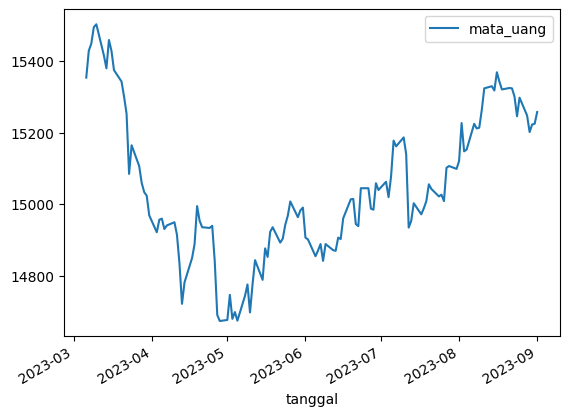

In [54]:
# membuat grafik perkembangan nilai mata uang  dolar ke Rupiah 
ws2.plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

## KESIMPULAN
* Nilai mata uang rupiah terhadap 1 dolar sangta flktuatif setiap harinya
* Range nilai mata uang rupiah ke dolar berkisar antara Rp. 14.400 sampai dengan Rp. 15.600  


(Put your analysis and conclusion here.)

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.